In [1]:
import os 
import cv2
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Cover image location
cover_dir = "C:/Users/PC/Masters Files/SteganographyDetection/Datasets/Dataset Cover Images"
# DCT RGB
dct_dir = "C:/Users/PC/Masters Files/SteganographyDetection/Datasets/Dataset DCT"

In [3]:
# Combine cover image data into a single array
cover_data = []
for i, filename in enumerate(os.listdir(cover_dir)):
    cover_image = cv2.imread(cover_dir + "/" + filename, cv2.IMREAD_UNCHANGED)
    cover_data.append(cover_image)
# The length of the array should be 60
print(len(cover_data))

60


In [4]:
# Combine stego image data into a single array
stego_data = []
for i, filename in enumerate(os.listdir(dct_dir)):
    stego_image = cv2.imread(dct_dir + "/" + filename, cv2.IMREAD_UNCHANGED)
    stego_data.append(stego_image)
# The length of the array should be 60
print(len(stego_data))

60


In [5]:
# Combine cover and stego images with corresponding labels 
labeled_data = []
for instance in cover_data:
    labeled_data.append([instance, 0])
for instance in stego_data:
    labeled_data.append([instance, 1])
len(labeled_data)

120

In [6]:
type(labeled_data[1][0])

numpy.ndarray

Text(0.5, 1.0, '0')

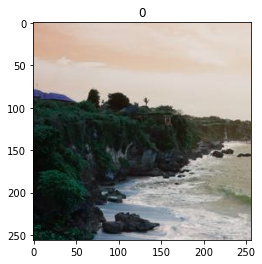

In [7]:
plt.imshow(np.array(labeled_data[1][0]).reshape(256,256,3))
plt.title(labeled_data[0][1])

In [8]:
# Separate labels from data
X = []
Y = []
for img, label in labeled_data:
    X.append(img)
    Y.append(label)

In [9]:
print(len(X))
print(len(Y))

120
120


In [10]:
# Training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [11]:
# Split training set to obtain validation set
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.25, random_state=2)

In [12]:
# Get dataset lengths
x_train_len = len(x_train)
y_train_len = len(y_train)
x_test_len = len(x_test)
y_test_len = len(y_test)
x_valid_len = len(x_valid)
y_valid_len = len(y_valid)

In [13]:
print("Training set length: " + str(x_train_len) + ", and label set is: " + str(y_train_len))
print("Testing set length: " + str(x_test_len)+ ", and label set is: " + str(y_test_len))
print("Validation set length: " + str(x_valid_len)+ ", and label set is: " + str(y_valid_len))

Training set length: 72, and label set is: 72
Testing set length: 24, and label set is: 24
Validation set length: 24, and label set is: 24


In [14]:
# Change data types
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)
x_valid = np.array(x_valid)
y_valid = np.array(y_valid)

In [15]:
# Normalise data
x_train = x_train / 255.0
x_test = x_test / 255.0
x_valid = x_valid / 255.0

<AxesSubplot:ylabel='count'>

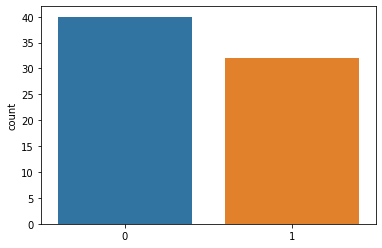

In [16]:
# Display class distribution in training set, where 0 is cover and 1 is stego
sns.countplot(x = y_train)

<AxesSubplot:ylabel='count'>

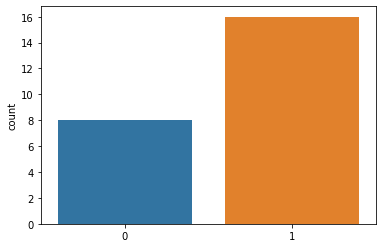

In [17]:
# Display class distribution in testing set, where 0 is cover and 1 is stego
sns.countplot(x = y_test)

<AxesSubplot:ylabel='count'>

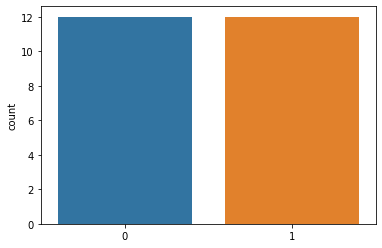

In [18]:
# Display class distribution in validation set, where 0 is cover and 1 is stego
sns.countplot(x = y_valid)

In [19]:
# Start timer
start = datetime.datetime.now()

In [28]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(layers.Flatten())
model.add(Dense(128, activation='relu'))
model.add(layers.Dense(1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 60, 60, 128)      

In [29]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [30]:
history = model.fit(x_train, y_train, epochs=12, validation_data=(x_valid, y_valid))

Epoch 1/12
3/3 [==============================] - 8s 2s/step - loss: 2.1709 - accuracy: 0.5556 - val_loss: 0.8835 - val_accuracy: 0.5000
Epoch 2/12
3/3 [==============================] - 8s 2s/step - loss: 1.8294 - accuracy: 0.4444 - val_loss: 0.5241 - val_accuracy: 0.8750
Epoch 3/12
3/3 [==============================] - 8s 2s/step - loss: 0.4352 - accuracy: 0.9167 - val_loss: 0.3894 - val_accuracy: 0.9167
Epoch 4/12
3/3 [==============================] - 8s 2s/step - loss: 0.2720 - accuracy: 0.9444 - val_loss: 0.2638 - val_accuracy: 0.8750
Epoch 5/12
3/3 [==============================] - 8s 2s/step - loss: 0.2766 - accuracy: 0.9028 - val_loss: 0.1768 - val_accuracy: 1.0000
Epoch 6/12
3/3 [==============================] - 8s 2s/step - loss: 0.4824 - accuracy: 0.8611 - val_loss: 0.1210 - val_accuracy: 0.9583
Epoch 7/12
3/3 [==============================] - 8s 2s/step - loss: 0.1308 - accuracy: 0.9444 - val_loss: 0.1628 - val_accuracy: 0.9583
Epoch 8/12
3/3 [=========================

In [23]:
# End timer
end = datetime.datetime.now()

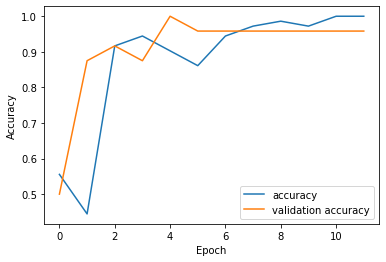

In [31]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

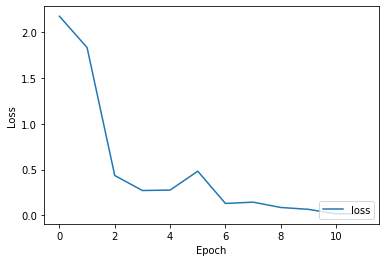

In [32]:
plt.plot(history.history['loss'], label='loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

In [33]:
# Evaluate trained model accuracy on previously unseen data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

1/1 - 0s - loss: 0.0809 - accuracy: 0.9583


In [27]:
# Evaluate model training time performance
duration=end-start
print ("Model training time: ", duration)

Model training time:  0:01:51.375931
